# Aula 3 - Introdução ao Python e Pandas

### Random Walk (com loop)

In [1]:
def exemplo(x):
    return x * 2

def apply_to_list(some_list, f):
    return [f(x) for x in some_list]

ints = [4, 0, 1, 5, 6]
lista1 = apply_to_list(ints, lambda x: x * 2)
lista2 = apply_to_list(ints, exemplo)
print(lista1)
print(lista2)

[8, 0, 2, 10, 12]
[8, 0, 2, 10, 12]


In [2]:
# pip é um instalador de pacotes do python
# Instala alguns pacotes do python
#!pip install tabulate xlrd openpyxl PySUS names

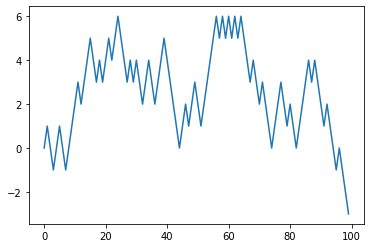

In [3]:
import random # Biblioteca para gerar números aleatórios
import matplotlib.pyplot  as plt # Biblioteca para plotar gráficos
%matplotlib inline 

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    # random.randint: Gera inteiros aleatórios no intervalo [0,1]
    step = 1 if random.randint(0, 1) else -1  # retorna 1 se o número aleatório for 1, e -1 caso contrário
    position += step # Dá um passo
    walk.append(position) # Registra o passo
plt.plot(walk[:100]) # Plota o gráfico


### Random Walk (sem loop)

In [4]:
import numpy as np
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps) # Gera inteiros aleatórios no intervalo [0,2)
steps = np.where(draws > 0, 1, -1) # Classifica os passos em 1 ou -1
walk = steps.cumsum() # cumsum: Aplica uma função de acumulação (soma cumulativa)
print(walk.min())
print(walk.max())
#argmax: Returns the indices of the maximum values along an axis. 
#        In case of multiple occurrences of the maximum values, the indices corresponding 
#        to the first occurrence are returned.
print((np.abs(walk) >= 5).argmax())


-16
33
10


### Vários Random Walks de uma vez

In [5]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # Gera uma array 2d de inteiros aleat. no intervalo [0,2) 
steps = np.where(draws > 0, 1, -1) # Classifica os passos em 1 ou -1
walks = steps.cumsum(axis=1) # cumsum(axis=1): Aplica uma função de acumulação (soma cumulativa) no eixo 1
walks

array([[ 1,  0,  1, ..., 46, 47, 48],
       [ 1,  0,  1, ..., 12, 13, 12],
       [ 1,  2,  3, ..., 52, 53, 52],
       ...,
       [ 1,  0,  1, ...,  2,  3,  2],
       [ 1,  0, -1, ..., 20, 21, 22],
       [ 1,  2,  1, ...,  4,  5,  6]])

In [6]:
walks.max()
walks.min()
# vec = np.abs(walks) >= 30
# print(vec)
hits30 = (np.abs(walks) >= 30).any(axis=1) # Verifiqua quais Walks passaram de 30 (ou -30) pelo menos uma vez
print(hits30)

[ True False  True ... False  True False]


In [7]:
hits30.sum() # Conta quantos Walks passaram de 30 (ou -30)

3463

## Função Lambda

### Comparar a função lambda com uma função normal

In [8]:
# Considere as funções abaixo
def exemplo(x):
    return x * 2

def apply_to_list(some_list, f):
    return [f(x) for x in some_list]

ints = [4, 0, 1, 5, 6]
print(apply_to_list(ints, exemplo))

# Crie uma função lambda que faz o mesmo que a função exemplo, e aplique a lista ints
print(apply_to_list(ints, lambda x: x * 2))



[8, 0, 2, 10, 12]
[8, 0, 2, 10, 12]


### Criar uma função lambda para ordenar uma lista de strings
#### pelo tamanho dos seus elementos, do menor para o maior


In [9]:
#Considere a lista de strings abaixo
strings = ['card', 'bar', 'aaa2222a', 'foo', 'abasb']
# Ordene esta lista pelo tamanho das strings usando uma função lambda
strings.sort(key=lambda x: x[-1])
print(strings)

['aaa2222a', 'abasb', 'card', 'foo', 'bar']


## Series

In [10]:
# Importe a biblioteca pandas
import pandas as pd
import numpy as np

### Crie um objeto Series

In [11]:
# Crie uma Serie contendo os seguintes elementos [4, 7, -5, 3]
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [12]:
# Crie um objeto Series contendo [4, 7, -5, 3] e 
#   defina seu próprio array de índices como sendo ['d', 'b', 'a', 'c']
obj2 = pd.Series([4, 7, -5, 3, 'a'], index=['d', 'b', 'a', 'c', 'f'])
obj2

d     4
b     7
a    -5
c     3
f     a
dtype: object

### Use o índice para acessar o valor

In [13]:
# Retorne o elemento de índice a
obj2['a']

-5

In [14]:
# Atribua o valor 6 ao elemento de índice d
obj2['d'] = 6
obj2

d     6
b     7
a    -5
c     3
f     a
dtype: object

In [15]:
# Retorne os valores de índice 'c', 'a' e 'd'
obj2[['c', 'a', 'd']]

c     3
a    -5
d     6
dtype: object

### Pode ser usada em contextos onde você usaria um dicionário

In [16]:
# Verifique se o índice 'c' está presente na Serie criada no exercício anterior
'c' in obj2

True

In [17]:
# Verifique se o índice 'e' está presente na Serie criada no exercício anterior
'e' in obj2

False

### Use o operações semelhantes às operações NumPy

In [18]:
# Considere a seguinte serie
obj2 = pd.Series([6, 7, -5, 3], index=['d', 'b', 'a', 'c'])
# Retorne os elementos cujo valor seja maior que 0
# 
teste = obj2 > 0
# print(teste)
print(obj2[teste])
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64


d    6
b    7
c    3
dtype: int64

In [19]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [20]:
# Retorne os valores da Serie obj2 multiplicados por 2
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [21]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [22]:
# Retorne os valores da aplicação da função exponencial (exp) a Serie obj2
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

### Criando uma Serie com um dicionário

In [23]:
# Crie uma série como seguinte dicionário 
# {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

### Criando uma Serie com um dicionário
#### mas especificando seu próprio índice separadamente

In [24]:
# Crie uma série como seguinte dicionário 
# sdata= {'Ohio': 35000, 'Texas': 71000, 'Oregon': None, 'Utah': None}
# mas especificando como índice este vetor ['California', 'Ohio', 'Oregon', 'Texas']
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [25]:
# obj2[obj2 > 0]
# print(pd.notnull(obj4))
obj4[obj4>20000]
# obj4[['Ohio', 'Oregon']]

Ohio     35000.0
Texas    71000.0
dtype: float64

### Valores Ausentes/Indisponíveis (NA)

In [26]:
# Retorne quais elementos da Serie anterior (obj4) tem valores NA
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [27]:
# Retorne quais elementos da Serie anterior (obj4) não tem valores NA
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [28]:
# Retorne quais valores da Serie anterior (obj4) tem valores NA, usando a função da própria Serie
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

### Aritmética com Series
#### Automaticamente alinha os valores pelo índice

In [29]:
# Some as séries criadas nos dois exercícios anteriores (obj3 e obj4)
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

## DataFrame

In [30]:
# Crie um data frame a partir dos dados do seguinte dicionário, chame-o de frame
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


### Mostre as primeiras linhas de um DataFrame

In [31]:
# Acesse as primeiras linhas do dataframe
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


### Uma coluna pode ser recuperada como uma Serie
#### A notação .nome_coluna não funciona quando o nome da coluna contém espaços
### Acostume-se a usar a notação ['nome_coluna']


In [32]:
# Acesse a coluna state usando a sintaxe com colchetes
frame['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [33]:
# Acesse a coluna year com a sintaxe .nome
frame.year

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

### Colunas podem ser modificadas por atribuição
#### Atribuição de um valor único ou de um array numpy

In [34]:
# Atribua o valor 16.5 para todas as posições da coluna debt
# Quando a coluna não existir, o pandas cria ela pra você
frame['debt'] = 16.5
frame

,state,year,pop,debt
0,Ohio,2000,1.5,16.5
1,Ohio,2001,1.7,16.5
2,Ohio,2002,3.6,16.5
3,Nevada,2001,2.4,16.5
4,Nevada,2002,2.9,16.5
5,Nevada,2003,3.2,16.5


In [35]:
# Atribua o valor de um intervalo de 0 a 5 (float) na coluna debt
frame['debt'] = np.arange(6.)
frame

,state,year,pop,debt
0,Ohio,2000,1.5,0.0
1,Ohio,2001,1.7,1.0
2,Ohio,2002,3.6,2.0
3,Nevada,2001,2.4,3.0
4,Nevada,2002,2.9,4.0
5,Nevada,2003,3.2,5.0


In [36]:
# Crie uma nova coluna chamada eastern com o valor True para 
#   as linhas cujo estado seja Ohio, e False caso contrário
frame['eastern'] = frame.state == 'Ohio'
frame

,state,year,pop,debt,eastern
0,Ohio,2000,1.5,0.0,True
1,Ohio,2001,1.7,1.0,True
2,Ohio,2002,3.6,2.0,True
3,Nevada,2001,2.4,3.0,False
4,Nevada,2002,2.9,4.0,False
5,Nevada,2003,3.2,5.0,False


### del exclui as colunas (como em um dicionário)

In [37]:
# Delete a coluna eastern
del frame['eastern']
frame.columns

Index(['state', 'year', 'pop', 'debt'], dtype='object')

### Criar um DataFrame a partir de um dicionário de dicionários

In [38]:
# Crie um Dataframe a partir do seguinte dicionário:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
        'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


### O atributo values retorna um array 2d com os valores

In [66]:
# retorne um array 2d com os valores do frame3
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

### Removendo entradas de uma Serie

In [40]:
# Considere a Serie abaixo
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [41]:
# Crie um novo objeto removendo o item c
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [42]:
# Retorne a serie sem os itens c e d
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

### Removendo entradas de um DataFrame
#### Pode-se remover linhas ou colunas

In [43]:
# Considere o dataframe abaixo
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [44]:
# Retorne um dataframe sem as colunas Colorado e Ohio
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [45]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


### Atribuindo valor num DataFrame

In [46]:
# Considere o dataframe abaixo
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [47]:
# Retorne um dataframen contendo True para itens menores que 5, e False caso contrário
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [48]:
# Atribua o valor zero onde os valores do dataframe são menores que 5
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Filtro e Seleção

In [49]:
# Selecione as colunas three e one
data[['three', 'one']]

,three,one
Ohio,0,0
Colorado,6,0
Utah,10,8
New York,14,12


In [50]:
# Retorne as linhas do dataframe cujo valor da coluna three seja maior que 5
data[data['three'] > 5]

,one,two,three,four
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Seleção com o Operador loc e iloc
#### Seleção de linhas ou linhas e colunas

In [51]:
# Retorne o subconjunto especificado pela linha colorado e colunas two e three
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [52]:
# Retorne o subconjunto especificado pela linha 2 e colunas 3, 0 e 1
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

### Outros exemplos de loc, iloc e []

In [53]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data, index=['a', 'b', 'c', 'd', 'e', 'f'])
frame

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7
c,Ohio,2002,3.6
d,Nevada,2001,2.4
e,Nevada,2002,2.9
f,Nevada,2003,3.2


In [54]:
# Nome(s) de coluna(s)
print(frame.loc['a']) 
# Nome(s) de linha(s) e nomes de coluna(s)
print(frame.loc['a', 'pop'])
# Vetor de booleano e nome de coluna
print(frame.loc[[True, True, False, False, False, False], 'pop']) 
# Vetor(es) de booleano(s)
print(frame.loc[[True, True, False, False, False, False], [True, True, False]]) 
print(frame.iloc[0:2, 1]) # Indice(s) da(s) linha(s) e coluna(s)
print(frame['pop']) # Nome(s) da(s) colunas
print(frame[[True, True, False, False, False, False]]) # Vetor de booleano

state    Ohio
year     2000
pop       1.5
Name: a, dtype: object
1.5
a    1.5
b    1.7
Name: pop, dtype: float64
  state  year
a  Ohio  2000
b  Ohio  2001
a    2000
b    2001
Name: year, dtype: int64
a    1.5
b    1.7
c    3.6
d    2.4
e    2.9
f    3.2
Name: pop, dtype: float64
  state  year  pop
a  Ohio  2000  1.5
b  Ohio  2001  1.7


### Função apply
#### Aplica uma função às linhas ou às colunas de um DataFrame

In [55]:
# Considere o dataframe abaixo
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                        index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [56]:
# Crie uma função lambda para calcular a diferença 
#   entre o valor máximo e o valor mínimo de uma Serie, 
#   e aplique-a ao dataframe frame, fazendo o cálculo no eixo das linhas
f = lambda x: x.max() - x.min()
frame.apply(f)

b    2.539511
d    2.805900
e    1.867968
dtype: float64

In [57]:
# aplique afunção lambda ao dataframe frame, fazendo o cálculo no eixo das colunas
frame.apply(f, axis='columns')

Utah      1.267134
Ohio      1.205288
Texas     2.937099
Oregon    2.572600
dtype: float64

### Função applymap
#### Aplica uma função a cada element (element-wise)

In [58]:
# Crie uma função lambda para formatar um número float com duas casas decimais,
#    e aplique-a ao dataframe frame
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.56,0.51,-0.76
Ohio,-0.77,-1.98,-1.29
Texas,-2.36,-1.06,0.57
Oregon,0.18,-2.30,0.28


### Sumarização e Estatística Descritiva

In [59]:
# Considere o dataframe abaixo
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                    [np.nan, np.nan], [0.75, -1.3]],
                    index=['a', 'b', 'c', 'd'],
                    columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [60]:
# Calcule a soma ao longo do eixo das linhas
df.sum()

one    9.25
two   -5.80
dtype: float64

In [61]:
# Calcule a soma ao longo do eixo das colunas
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

### mean (média)
#### Os valores de NA são excluídos, a menos que a fatia inteira linha ou coluna seja NA.
#### Isso pode ser desativado com a opção skipna

In [62]:
# Calcule a média ao longo do eixo das linhas desconsiderando valores NA
df.mean(axis='columns')

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [63]:
# Calcule a média ao longo do eixo das linhas 
#    retornando NA para colunas que tenham algum NA
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

### describe (resumo de várias estatísticas)

In [64]:
# Aplique um método para calcular várias estatísticas do dataframe df
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000
